Mit einer Dimensionsreduktion wird versucht, den Informationsgehalt hochdimensionaler Daten (d.h. viele Spalten) auf wenige Spalten abzubilden. Typischerweise wird mit versucht, nach der Reduktion mit 2 Spalten zu arbeiten, da diese gut visualisiert werden können. In dieser Aufgabe soll eine Principal Component Analysis (PCA) als grundlegende Technik untersucht werden.

### Teilaufgabe 1
Laden Sie den digits Datensatz von sklearn und zeigen Sie sich die ersten 50 "handwritten digits" an. Beschränken Sie sich auf die Zahlen 0,1,...,5. Sie können sich am nachfolgenden Programmcode orientieren.

```
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
images = digits["images"]  # 1083 Bilder der Größe 8x8 Pixel
target = digits["target"]  # Die auf den Bildern gezeigten Zahlen (0,...,5), Array der Länge 1083
data   = digits["data"]    # Die Bilder nochmals jeweils als "flacher" Datenvektor der Länge 64 
plt.imshow ( images[0], cmap="Grays" )
```

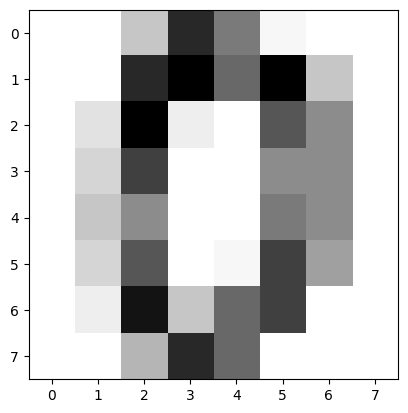

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)
images = digits["images"]
target = digits["target"]
data = digits["data"]
plt.imshow(images[0], cmap='Grays')

In [57]:
target

array([0, 1, 2, ..., 4, 4, 0], shape=(1083,))

### Teilaufgabe 2
Wenden Sie nun auf `data` eine [ PCA ](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) an. Orientieren Sie sich am nachfolgenden Code. Die transformierten Daten sollten nun ein Array mit weiterhin 1083 Zeilen, aber 2 Spalten beinhalten. Visualisieren Sie diese beiden Spalten in einem Scatterplot und färben Sie die jeweiligen Punktpaare gemäß der auf diesem Bild dargestellten Zahl (`target`) ein.

```
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_transformiert = pca.fit_transform(X)
```

In [58]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]], shape=(1083, 64))

In [59]:
data.shape

(1083, 64)

In [60]:
images.shape

(1083, 8, 8)

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(data)
X_transformed.shape

(1083, 2)

In [62]:
X_transformed

array([[ 10.76255844, -24.73806944],
       [ -0.62690579,  26.83050009],
       [  1.68579972,  12.29145392],
       ...,
       [ 30.8498654 ,   6.30638445],
       [ 32.14391392,  10.57477502],
       [ 16.46964928, -21.36013722]], shape=(1083, 2))

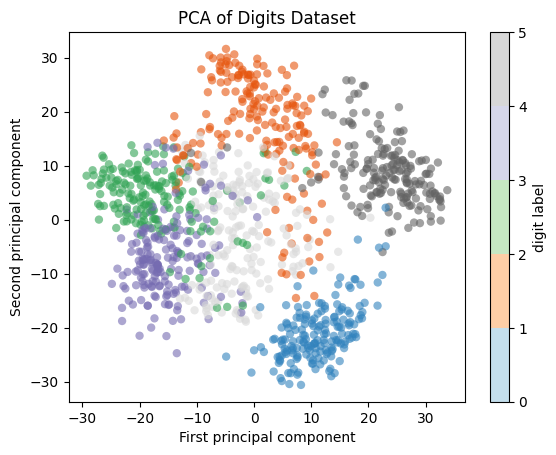

In [63]:
import numpy as np

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=target, edgecolor='none', alpha=0.6,
			cmap="tab20c")


unique_target = np.unique(target)

cbar = plt.colorbar(boundaries=unique_target, ticks=unique_target)



cbar.set_label('digit label')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('PCA of Digits Dataset')
plt.show()

### Teilaufgabe 3
Rekonstruieren Sie die Originaldaten basierend auf den transformierten Daten. Orientieren Sie sich am nachfolgenden Code. Zeigen Sie die ersten 50 rekonstruierten Bilder an und vergleichen Sie das Ergebnis mit Teilaufgabe 1. (Beachten Sie hierbei, dass die PCA auf den "flachen" Datenvektoren der Länge 64 arbeitete; das Ergebnis ist also ebenfalls ein Vektor der Länge 64, der erst wieder in ein Array der Größe 8x8 "reshaped" werden muss.)

```
X_reconstructed = pca.inverse_transform(X_transformiert)

```

In [64]:
X_reconstructed = pca.inverse_transform(X_transformed)
X_reconstructed.shape

(1083, 64)

In [65]:
X_rounded = np.round(X_reconstructed)

In [66]:
images_reconstructed = X_rounded.reshape(images.shape)
images_reconstructed.shape

(1083, 8, 8)

In [71]:
import numpy as np
np.array_equal(images, images_reconstructed)

False

In [72]:
np.array_equiv(images, images_reconstructed)

False

In [69]:
images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  2.,  0.,  0.],
        [ 0.,  0.,  8., ...,  1.,  2.,  0.

In [70]:
images_reconstructed

array([[[ 0.,  0.,  5., ...,  6.,  1.,  0.],
        [ 0.,  1., 13., ..., 11.,  2.,  0.],
        [ 0.,  4., 14., ..., 11.,  4.,  0.],
        ...,
        [ 0.,  4., 10., ..., 14.,  7., -0.],
        [ 0.,  1., 10., ..., 14.,  3., -0.],
        [ 0.,  0.,  5., ...,  6., -0., -0.]],

       [[ 0.,  0.,  4., ...,  4.,  1.,  0.],
        [ 0.,  2.,  5., ...,  3.,  1.,  0.],
        [ 0.,  1.,  7., ...,  3.,  0.,  0.],
        ...,
        [ 0.,  1.,  5., ...,  3., -2.,  0.],
        [ 0.,  1.,  3., ...,  3.,  2.,  0.],
        [ 0.,  1.,  4., ...,  5.,  3.,  1.]],

       [[ 0.,  0.,  5., ...,  5.,  1.,  0.],
        [ 0.,  2.,  7., ...,  6.,  1.,  0.],
        [ 0.,  2.,  9., ...,  5.,  1.,  0.],
        ...,
        [ 0.,  2.,  6., ...,  6.,  1.,  0.],
        [ 0.,  1.,  5., ...,  6.,  2.,  0.],
        [ 0.,  0.,  5., ...,  6.,  2.,  1.]],

       ...,

       [[ 0., -0., -2., ...,  4.,  1.,  0.],
        [-0., -2.,  2., ...,  5.,  1.,  0.],
        [ 0.,  1., 13., ...,  8.,  4.,  0.

Vektoren sind nicht identisch, selbst nach Rundung besteht ein Unterschied.